In [2]:
import cv2
from scipy.ndimage import label
import scipy.misc
from PIL import Image
import numpy 
# from skimage.morphology import label 

# opening the image and converting it to grayscale
a = cv2.imread('cellimage.png')
# covnerting image from color to grayscale
a1 = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# thresholding the image to obtain cell pixels
thresh,b1 = cv2.threshold(a1, 0, 255,
            cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# since Otsu's method has over segmented the image
# erosion operation is performed 
b2 = cv2.erode(b1, None,iterations = 2)
# distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)
# thresholding the distance transform image to obtain 
# pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 
             255, cv2.THRESH_BINARY)	
# performing labeling 
#labelled = label(b, background = 0)
labelled, ncc = label(dt)
# labelled is converted to 32-bit integer
labelled = labelled.astype(numpy.int32)
# performing watershed 
cv2.watershed(a, labelled)
# converting the ndarray to image
dt1 = scipy.misc.toimage(labelled)  
# saving the image as watershed_output.png
#dt1.save('../Figures/watershed_output.png')

In [12]:
labelled =  scipy.misc.toimage(dt)  

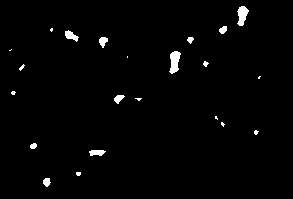

In [14]:
labelled

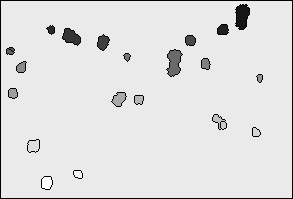

In [17]:
dt1